# Moving Average Crossover 

The moving average crossover trading strategy involves using moving averages where one follows a short window size
while another follows a longer one. A longer window size will follow the trend of the asset price in the long run
while a shorter window size follows short term trends in asset price. 

These Moving Averages can be used to identify golden crosses. This is where the short term MA rises above the long term MA. This identifies potential areas to buy in at, as in the short term asset prices will rise while in the long run the MA also leads on that the price will continue to rise.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def check_available(asset):
    """
    Checks if an asset is available via the Yahoo Finance API.
    """
    info = yf.Ticker(asset).history(
        period='7d',
        interval='1d')
    return len(info) > 0

In [4]:
check_available("MSFT")

True

# Plot close price for underlying asset

MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2024-01-02  366.707367  371.680909  362.653379  369.663798  25258600
2024-01-03  366.440430  369.070578  364.373891  364.868279  23083500
2024-01-04  363.810272  368.912360  363.048926  366.509642  20901500
2024-01-05  363.622406  367.884029  362.386436  364.828714  20987000
2024-01-08  370.484528  370.988813  364.868286  365.155010  23134000
...                ...         ...         ...         ...       ...
2025-06-24  490.109985  491.850006  486.799988  488.950012  22305600
2025-06-25  492.269989  494.559998  489.390015  492.040009  17495100
2025-06-26  497.450012  498.040009  492.80

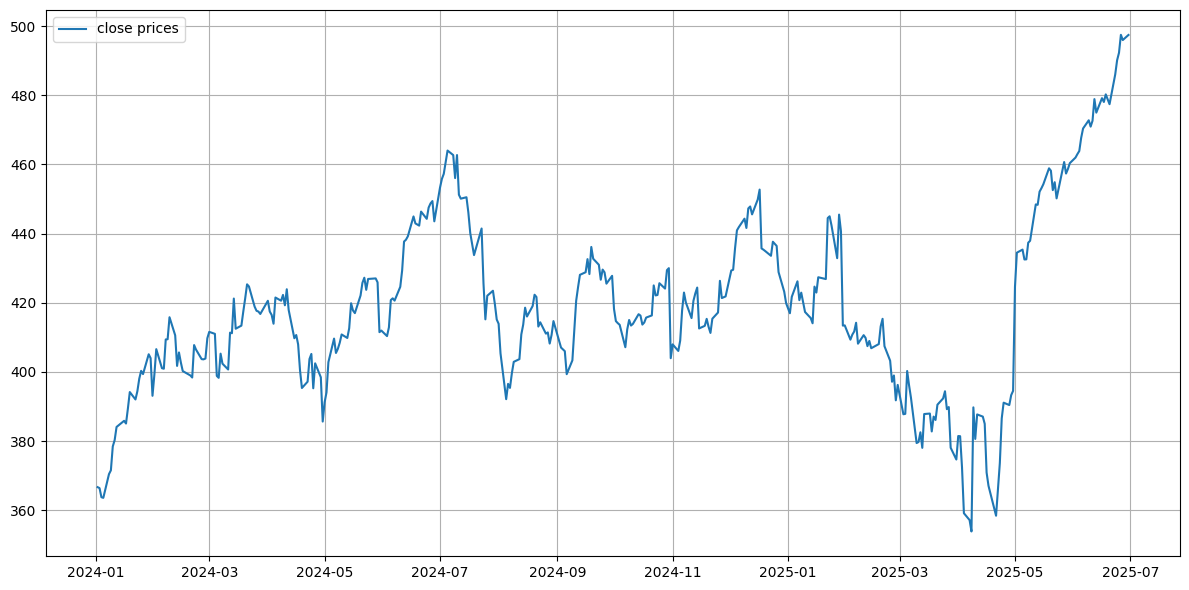

In [5]:
# create datafram for asset
df = yf.download(
    tickers = "MSFT",
    start = '2024-01-01',
    end = '2025-07-01',
    progress = False
)
print(df.columns)
print(df)


# format plot
plt.figure(figsize=(12, 6))
plt.plot(df['Close'] , label='close prices')
plt.grid(True); plt.tight_layout(); plt.legend()
plt.show()

# Plotting Moving Averages and Identifying crossovers

In [6]:
# load the datafram again allowing this cell to be run multiple times without causing NaN issues in the SMA columns
df = yf.download(
    tickers = "MSFT",
    start = '2024-01-01',
    end = '2025-06-25',
    progress = False
)


# moving averages
df['SMA20'] = df['Close'].rolling(window = 20).mean()
df['SMA50'] = df['Close'].rolling(window = 50).mean()

# identify crossovers
prev_SMA20 = df['SMA20'].shift(1)
prev_SMA50 = df['SMA50'].shift(1)


df['bullish'] = (prev_SMA20 < prev_SMA50) & (df['SMA20'] > df['SMA50'])
df['bearish'] = (prev_SMA50 < prev_SMA20) & (df['SMA50'] > df['SMA20'])

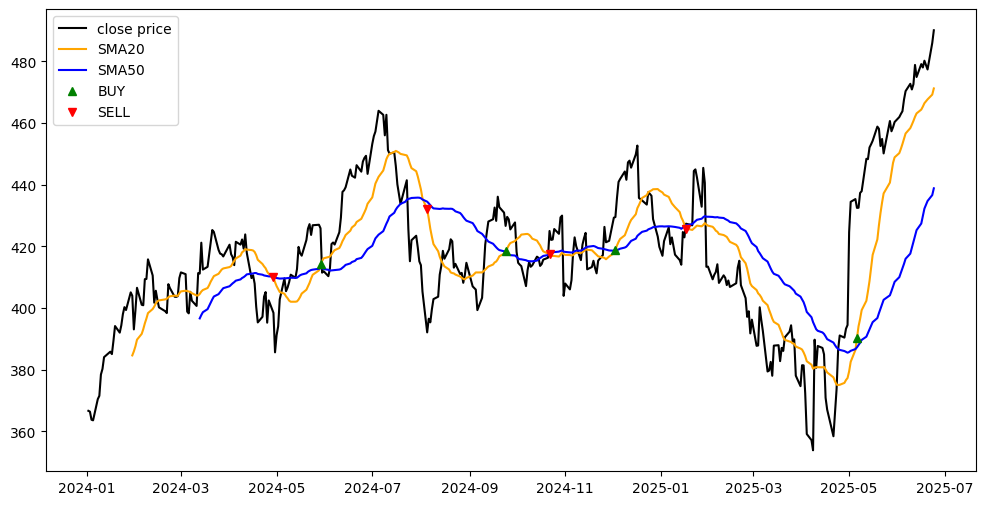

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = 'close price', color = 'black')
plt.plot(df['SMA20'], label = 'SMA20', color = 'orange')
plt.plot(df['SMA50'], label = 'SMA50', color = 'blue')
plt.plot(df[df['bullish']].index, df['SMA20'][df['bullish']], label='BUY', color = 'green', marker='^', linestyle = 'None')
plt.plot(df[df['bearish']].index, df['SMA20'][df['bearish']], label='SELL', color = 'red', marker='v', linestyle = 'None')

plt.legend()
plt.show()

The moving average crossover strategy identifies when to buy and sell. However, this method involves large time lags resulting in scenarios where an asset has been bought for a less
optimal price. This is because a simple moving average values each data point in the window equally meaning the price of the asset 20 days before holds the same weight as the price 1 day ago.
This makes catching dips in the price much slower as the price of an asset 20 days ago hugely impacts the average, even though this information does not add much value to the trend of todays price.

Using an exponential moving average, the prices taken recently hold more value and help calculate an average which is closer to the current trend. This reduces the time lag between
pricing the average and helps catch dips or rises quicker.

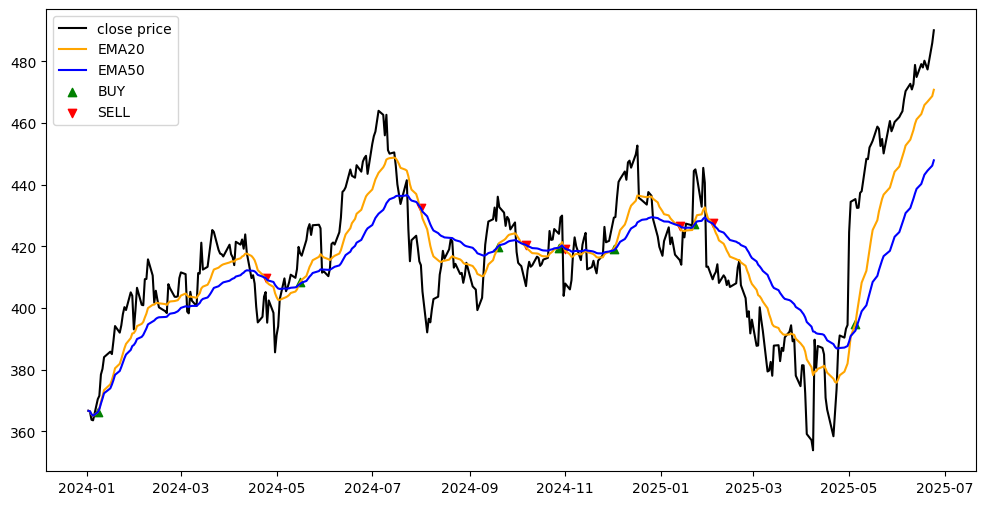

In [8]:
# load in dataframe for selected ticker
df = yf.download(
    tickers = "MSFT",
    start = '2024-01-01',
    end = '2025-06-25',
    progress = False
)

# calculate EMA
df['EMA20'] = df['Close'].ewm(span=20).mean()
df['EMA50'] = df['Close'].ewm(span=50).mean()

# calculate crossover points
prev_EMA20 = df['EMA20'].shift(1)
prev_EMA50 = df['EMA50'].shift(1)

df['bullish'] = (prev_EMA20 < prev_EMA50) & (df['EMA20'] > df['EMA50'])
df['bearish'] = (prev_EMA50 < prev_EMA20) & (df['EMA50'] > df['EMA20'])

plt.figure(figsize = (12,6))
plt.plot(df['Close'], label = 'close price', color='black')
plt.plot(df['EMA20'] ,label='EMA20', color='orange')
plt.plot(df['EMA50'], label='EMA50', color = 'blue')
plt.scatter(df[df['bullish']].index, df['EMA20'][df['bullish']], label='BUY',marker = '^', color = 'green')
plt.scatter(df[df['bearish']].index, df['EMA50'][df['bearish']], label='SELL', marker='v', color='red')
plt.legend()
plt.show()